In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
from collections import Counter

# Importing Data (5 mins)

In [2]:
data = pd.read_csv("Boston_Hotels.csv")
data.head()

,search_date,search_dayofweek,search_month,hotel_id,hotel_name,stars,avg_review_score,miles_to_city_center,result_position,price,clickout
0,01-01-2017,6,1,32589,The Eliot Hotel,4,89,1.59,2,394,0
1,01-01-2017,6,1,32589,The Eliot Hotel,4,89,1.59,3,394,0
2,01-01-2017,6,1,32589,The Eliot Hotel,4,89,1.59,3,309,0
3,01-01-2017,6,1,129186,Hotel 140,3,80,0.98,3,147,0
4,01-01-2017,6,1,129186,Hotel 140,3,80,0.98,3,147,0


Before importing the data, 388 observations where the Price column had null values were completely dropped from the data. This was done to avoid any further issues while calculating commissions (which is directly related to price)

# Clickouts Based on Days of the Week (5 mins)

In [3]:
unique_weekday = sorted(data['search_dayofweek'].unique())
clickout_counts = []
no_clickout_counts = []
for i in unique_weekday:
    a = len(data[(data["search_dayofweek"] == i) & (data["clickout"] == 1)])
    clickout_counts.append(a)
    b = len(data[(data["search_dayofweek"] == i) & (data["clickout"] == 0)])
    no_clickout_counts.append(b)
print(clickout_counts)
print(no_clickout_counts)

[154, 142, 126, 114, 131, 74, 113]
[8714, 7760, 7039, 6915, 6560, 4326, 5512]


In the above cell, we are counting the total number of Clickouts (1) and No Clickouts (0) based on days of the week (0-6, 7 days). The result of the above cell shows 2 lists where the first one is the total number of clickouts (1) in the entire data for days 0-6 (in order) and the second one is the total number of no clickouts (0) in the entire data for dats 0-6 (in order).

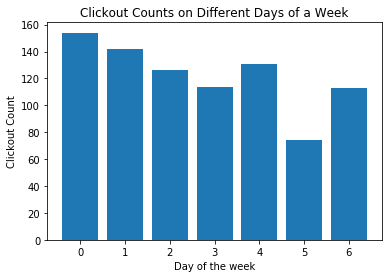

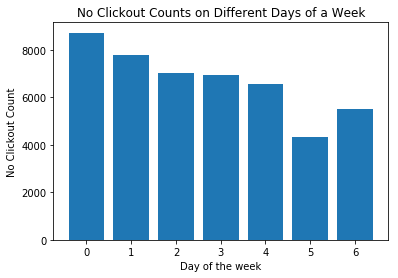

In [4]:
plt.bar(unique_weekday, clickout_counts)
plt.xlabel("Day of the week")
plt.ylabel("Clickout Count")
plt.title("Clickout Counts on Different Days of a Week")
plt.show()

plt.bar(unique_weekday, no_clickout_counts)
plt.xlabel("Day of the week")
plt.ylabel("No Clickout Count")
plt.title("No Clickout Counts on Different Days of a Week")
plt.show()

In the above cell, we are plotting Clickout (1) counts and No Clickout (0) counts for each day of the week. From the plots we see that the maximum clickouts happen on the first 2 days of the week (0,1) and the lowest clickout happens on the 6th day of the week (5). But we also notice that the higest and the lowest no clickouts are also on the same days.

By looking at the counts we understand, that the data is not balanced and equal for all the days of the week. Days 0 and 1 have a lot of observations in the data whereas days 5 and 6 have comparitively lower observations and thus it is not right to make conclusions based on the clickout and no clickout counts. We thus focus on other better ways to find weekly trends 

# No Clickout to Clickout Ratio Based on Days of the Week (5 mins)

In [5]:
clickout_ratio = []
for i in range(0,7):
    a = no_clickout_counts[i]/clickout_counts[i]
    clickout_ratio.append(a)
clickout_ratio

[56.58441558441559,
 54.647887323943664,
 55.86507936507937,
 60.6578947368421,
 50.0763358778626,
 58.45945945945946,
 48.7787610619469]

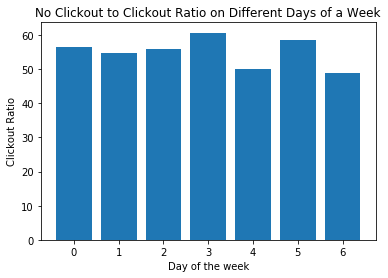

In [6]:
plt.bar(unique_weekday, clickout_ratio)
plt.xlabel("Day of the week")
plt.ylabel("Clickout Ratio")
plt.title("No Clickout to Clickout Ratio on Different Days of a Week")
plt.show()

In the above two cells, we calculate the No Clickout to Clickout Ratio to try and understand the distribution over each day of the week. We notice that the ratio is high for day 3 and 5 as compared to the other. But we again notice that the high value for these days is mainly because they either have low clickout counts or high no clickout counts as compared to other days both of which can lead to a higher value of the no clickout to clickout ratio. Thus, this measure is also not one of the best to understand weekly trends and we go ahead and calculate the clickout percentage.

# Clickout Percentage (Clickout to Total Search Ratio) Based on Days of the Week (5 mins)

In [7]:
clickout_percentage = []
for i in range(0,7):
    a = clickout_counts[i] + no_clickout_counts[i]
    value = (clickout_counts[i]/a)*100
    clickout_percentage.append(value)
clickout_percentage

[1.7365809652683806,
 1.7970134143254872,
 1.7585484996510816,
 1.621852326077678,
 1.957853833507697,
 1.6818181818181819,
 2.008888888888889]

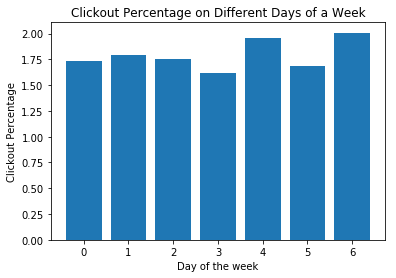

In [8]:
plt.bar(unique_weekday, clickout_percentage)
plt.xlabel("Day of the week")
plt.ylabel("Clickout Percentage")
plt.title("Clickout Percentage on Different Days of a Week")
plt.show()

In the above 2 cells, we calculate the Clickout Percentage (also same as Clickout Rate) based on the days of the week. It is calculated as the ratio of clickout counts (1) to total search counts (clickout + no clickouts). This measure does not involve any bias for any particular day and it provides us the best possible analysis on weekly basis considering the fact that the data is unbalanced for each day of the week.

From the plot above we notice that day 6 and day 4 have the highest clickout percentage as compared to other days. This means that there are higher chances of hotel searches getting converted to clickouts on day 4 and 6 as compared to other days.the lowest clickout percentage is for day 3.

# Correlation with Clickout Rate (Calculated Based on Days of the Week) (20 mins)

In [9]:
week_day = list(data['search_dayofweek'])
clickout_rate = []
for i in week_day:
    clickout_rate.append(clickout_percentage[i])
data['clickout_rate'] = clickout_rate
data.head()

,search_date,search_dayofweek,search_month,hotel_id,hotel_name,stars,avg_review_score,miles_to_city_center,result_position,price,clickout,clickout_rate
0,01-01-2017,6,1,32589,The Eliot Hotel,4,89,1.59,2,394,0,2.008889
1,01-01-2017,6,1,32589,The Eliot Hotel,4,89,1.59,3,394,0,2.008889
2,01-01-2017,6,1,32589,The Eliot Hotel,4,89,1.59,3,309,0,2.008889
3,01-01-2017,6,1,129186,Hotel 140,3,80,0.98,3,147,0,2.008889
4,01-01-2017,6,1,129186,Hotel 140,3,80,0.98,3,147,0,2.008889


In the above cell, we are working on adding a new column to the dataset. This column is called the Clickout Rate. It is basically the same as Clickout Percentage that we had calculated before this. Here we need to note that the clickout_rate has been caluclated on weekly basis and thus the values of clickout_rates for a particular day of the week would remain the same in the entire dataset (for eg. clickout rate of day 6 is 2.0088 in the entire dataset). We are going to check the features that mostly affect this clickout rate.

In [10]:
df = data.loc[:, ['search_dayofweek', 'search_month', 'stars', 'avg_review_score', 'miles_to_city_center', 'result_position', 'price', 'clickout_rate']]
df.head()

,search_dayofweek,search_month,stars,avg_review_score,miles_to_city_center,result_position,price,clickout_rate
0,6,1,4,89,1.59,2,394,2.008889
1,6,1,4,89,1.59,3,394,2.008889
2,6,1,4,89,1.59,3,309,2.008889
3,6,1,3,80,0.98,3,147,2.008889
4,6,1,3,80,0.98,3,147,2.008889


In [11]:
df.corr()

,search_dayofweek,search_month,stars,avg_review_score,miles_to_city_center,result_position,price,clickout_rate
search_dayofweek,1.000000,-0.010618,0.013192,0.013389,-0.009354,-0.009859,-0.040284,0.460049
search_month,-0.010618,1.000000,0.075684,-0.071699,-0.262187,-0.153688,0.171782,-0.002550
stars,0.013192,0.075684,1.000000,0.704799,-0.077364,0.032076,0.381027,0.010775
avg_review_score,0.013389,-0.071699,0.704799,1.000000,-0.011993,0.288930,0.339580,0.015431
miles_to_city_center,-0.009354,-0.262187,-0.077364,-0.011993,1.000000,0.141031,-0.032907,-0.024419
result_position,-0.009859,-0.153688,0.032076,0.288930,0.141031,1.000000,0.049257,-0.017136
price,-0.040284,0.171782,0.381027,0.339580,-0.032907,0.049257,1.000000,0.005551
clickout_rate,0.460049,-0.002550,0.010775,0.015431,-0.024419,-0.017136,0.005551,1.000000


In the above 2 cells, we have calculated the correlation between various different features of the dataset. Our aim is to find out the features which affect a higher clickout rate and a good way to do that is by finding out its correlation with different features. From the above table, we will only focus on the correlation values of different features with "clickout_rate".

We notice that "search_dayofweek" has a correlation of 0.4600 with "clickout_rate". This means that the day of the week highly affects the correlation rate. I believe this is because, the values of clickout_rate have been calculated using the days of the week (there are just 7 unique values in the clickout_rate column). Thus, it is obvious for the day of the week to be highly correlated to clickout rate.

Features like "stars" and "avg_review_score" are positively correlated with "clickout_rate". Although they are not very significant because of their low values, we can say that there are higher chances of people clicking out on a hotel if it has high stars and a high average review score.

Features like "miles_to_city_center" and "result_position" are negatively correlated with "clickout_rate". Although they are also not very significant because of their low values, we can say that there are higher chances of people clicking out on a hotel if its close to the city center and if its shows up on the top of Kayak search results.

Remaining two features "search_month" and "price" are highly insignificant.

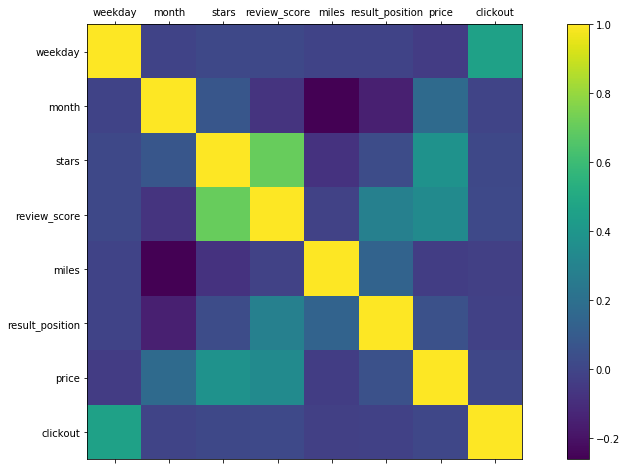

In [12]:
ticks = ['weekday', 'month', 'stars', 'review_score', 'miles', 'result_position', 'price', 'clickout']
fig, ax = plt.subplots(figsize=(16,8))
a = ax.matshow(df.corr())
plt.xticks(range(len(df.columns)),ticks)
plt.yticks(range(len(df.columns)), ticks)
plt.colorbar(a)
plt.show(a)

The above plot is a correlation plot of the features of the dataset. It is exactly based on the correlation matrix generated above.

We notice that the correlation between our features and clickout rate is not very good. I believe this could possibly be because the correlation rate has been caluclated using search_dayofweek and thus has only 7 unique values in around 48000 observations. Thus all the values in clickout rate are just copies of these 7 unique values which overall does not help in learning how the correlation_rate is changing with different features. In other words, we need more different data in clickout_rate to understand every minute change in it with respect to different features.

To achieve this, below, we calculate the clickout_rate based on search_date. The feature search_date has 212 unique dates in the dataset from 1st Jan 2017 to 31st July 2017 and thus we will have 212 unique values of clickout_rate. Lets find out if this  helps in understanding the effect of different features on clickout_rate

# Correlation with Clickout Rate (Calculated on Daily Basis) (15 mins)

In [13]:
unique_searchdate = data['search_date'].unique()
clickout_counts_1 = []
no_clickout_counts_1 = []
for i in unique_searchdate:
    a = len(data[(data["search_date"] == i) & (data["clickout"] == 1)])
    clickout_counts_1.append(a)
    b = len(data[(data["search_date"] == i) & (data["clickout"] == 0)])
    no_clickout_counts_1.append(b)
print(clickout_counts_1)
print(no_clickout_counts_1)

[1, 1, 2, 4, 2, 5, 4, 3, 4, 1, 2, 1, 0, 1, 0, 2, 1, 1, 1, 1, 2, 2, 2, 0, 1, 1, 1, 0, 0, 3, 0, 1, 1, 2, 0, 0, 3, 1, 1, 1, 4, 1, 6, 9, 4, 1, 1, 2, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 1, 6, 5, 3, 1, 5, 2, 1, 3, 3, 3, 1, 3, 1, 3, 1, 4, 5, 1, 2, 1, 2, 2, 3, 7, 1, 3, 7, 3, 3, 1, 7, 3, 3, 4, 11, 19, 9, 15, 13, 17, 34, 19, 10, 2, 1, 4, 0, 6, 5, 2, 1, 6, 4, 1, 1, 3, 0, 1, 5, 1, 3, 2, 3, 2, 4, 4, 0, 1, 3, 4, 0, 7, 1, 0, 0, 1, 6, 0, 3, 2, 1, 3, 5, 2, 3, 1, 3, 1, 0, 0, 2, 4, 2, 1, 2, 0, 1, 5, 4, 6, 2, 3, 1, 6, 11, 2, 1, 5, 1, 1, 4, 0, 3, 4, 3, 2, 3, 7, 8, 2, 1, 1, 0, 3, 0, 1, 7, 4, 2, 3, 0, 7, 6, 5, 13, 21, 15, 27, 15, 20, 20, 21, 13, 2, 7, 9, 15, 17, 9, 6, 6, 18, 13]
[66, 99, 166, 250, 270, 209, 157, 196, 262, 219, 145, 162, 187, 38, 62, 90, 103, 87, 146, 107, 61, 97, 126, 114, 81, 83, 70, 65, 88, 144, 165, 181, 148, 150, 89, 96, 169, 121, 155, 110, 225, 179, 268, 550, 267, 175, 162, 183, 127, 90, 104, 114, 153, 145, 142, 154, 209, 249, 206, 428, 388, 168, 90, 130, 155, 139, 181, 200, 161, 162, 213, 30

In [14]:
clickout_percentage_1 = []
for i in range(len(unique_searchdate)):
    a = clickout_counts_1[i] + no_clickout_counts_1[i]
    value = (clickout_counts_1[i]/a)*100
    clickout_percentage_1.append(value)
clickout_percentage_1

[1.4925373134328357,
 1.0,
 1.1904761904761905,
 1.574803149606299,
 0.7352941176470588,
 2.336448598130841,
 2.484472049689441,
 1.507537688442211,
 1.5037593984962405,
 0.45454545454545453,
 1.3605442176870748,
 0.6134969325153374,
 0.0,
 2.564102564102564,
 0.0,
 2.1739130434782608,
 0.9615384615384616,
 1.1363636363636365,
 0.6802721088435374,
 0.9259259259259258,
 3.1746031746031744,
 2.0202020202020203,
 1.5625,
 0.0,
 1.2195121951219512,
 1.1904761904761905,
 1.4084507042253522,
 0.0,
 0.0,
 2.0408163265306123,
 0.0,
 0.5494505494505495,
 0.6711409395973155,
 1.3157894736842104,
 0.0,
 0.0,
 1.744186046511628,
 0.819672131147541,
 0.641025641025641,
 0.9009009009009009,
 1.7467248908296942,
 0.5555555555555556,
 2.18978102189781,
 1.6100178890876566,
 1.4760147601476015,
 0.5681818181818182,
 0.6134969325153374,
 1.0810810810810811,
 0.78125,
 0.0,
 0.9523809523809524,
 1.7241379310344827,
 0.0,
 0.684931506849315,
 0.0,
 0.0,
 0.0,
 0.0,
 0.4830917874396135,
 1.3824884792626728

In [15]:
clickout_rate_1 = []
for i in range(len(data)):
    for j in range(len(unique_searchdate)):
        if unique_searchdate[j] == data['search_date'][i]:
            clickout_rate_1.append(clickout_percentage_1[j])

In [16]:
data['clickout_rate_1'] = clickout_rate_1
data.head()

,search_date,search_dayofweek,search_month,hotel_id,hotel_name,stars,avg_review_score,miles_to_city_center,result_position,price,clickout,clickout_rate,clickout_rate_1
0,01-01-2017,6,1,32589,The Eliot Hotel,4,89,1.59,2,394,0,2.008889,1.492537
1,01-01-2017,6,1,32589,The Eliot Hotel,4,89,1.59,3,394,0,2.008889,1.492537
2,01-01-2017,6,1,32589,The Eliot Hotel,4,89,1.59,3,309,0,2.008889,1.492537
3,01-01-2017,6,1,129186,Hotel 140,3,80,0.98,3,147,0,2.008889,1.492537
4,01-01-2017,6,1,129186,Hotel 140,3,80,0.98,3,147,0,2.008889,1.492537


In the above few cells, we calculate the clickout_rate using search_date and the table above has an extra column added called "clickout_rate_1" which shows clickout rates based on each date. The column has 212 unique values.

In [17]:
df = data.loc[:, ['search_dayofweek', 'search_month', 'stars', 'avg_review_score', 'miles_to_city_center', 'result_position', 'price', 'clickout_rate_1']]
df.head()

,search_dayofweek,search_month,stars,avg_review_score,miles_to_city_center,result_position,price,clickout_rate_1
0,6,1,4,89,1.59,2,394,1.492537
1,6,1,4,89,1.59,3,394,1.492537
2,6,1,4,89,1.59,3,309,1.492537
3,6,1,3,80,0.98,3,147,1.492537
4,6,1,3,80,0.98,3,147,1.492537


In [18]:
df.corr()

,search_dayofweek,search_month,stars,avg_review_score,miles_to_city_center,result_position,price,clickout_rate_1
search_dayofweek,1.000000,-0.010618,0.013192,0.013389,-0.009354,-0.009859,-0.040284,0.046832
search_month,-0.010618,1.000000,0.075684,-0.071699,-0.262187,-0.153688,0.171782,0.368430
stars,0.013192,0.075684,1.000000,0.704799,-0.077364,0.032076,0.381027,-0.014136
avg_review_score,0.013389,-0.071699,0.704799,1.000000,-0.011993,0.288930,0.339580,-0.177291
miles_to_city_center,-0.009354,-0.262187,-0.077364,-0.011993,1.000000,0.141031,-0.032907,-0.166155
result_position,-0.009859,-0.153688,0.032076,0.288930,0.141031,1.000000,0.049257,-0.231590
price,-0.040284,0.171782,0.381027,0.339580,-0.032907,0.049257,1.000000,0.011054
clickout_rate_1,0.046832,0.368430,-0.014136,-0.177291,-0.166155,-0.231590,0.011054,1.000000


We try and understand the effect of all different features on the new clickout_rates generated using search_date to see if we observe any change from the previous results. 

We notice that now the effect of search_dayofweek has dropped by almost 10 times than the earlier result. This is possibly because now the new clickout ratees are not been calculated using search_date. Surprisingly, the search_month has become quite significant now and it is positively correlated which means that clickout rates are higher as we go ahead in a year.

Features like stars and avg_review_score are now negatively correlated which kind of does not make sense. Why would people want to clickout on a hotel which has low stars and low avg_review_score.

Features like miles_to_city_center and result_position are still negatively correlated and they ahve become more significant than earlier. This means that people definitely do give more focus on hotels which are closer to the city center and which show up on the top of Kayak search results.

Price is still not very significant.

From this we notice that features like miles_to_city_center and result_position are definitely very important when it comes to people deciding to clickout on a particular hotel or not. The other features are not as important as these ones.

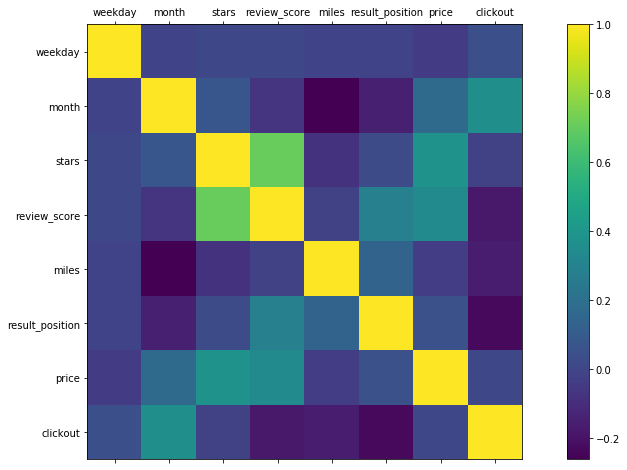

In [19]:
ticks = ['weekday', 'month', 'stars', 'review_score', 'miles', 'result_position', 'price', 'clickout']
fig, ax = plt.subplots(figsize=(16,8))
a = ax.matshow(df.corr())
plt.xticks(range(len(df.columns)),ticks)
plt.yticks(range(len(df.columns)), ticks)
plt.colorbar(a)
plt.show(a)

# Calculating Commission (10% of Price when there is a Clickout) (20 mins)

In [20]:
commission = []
for i in  range(len(data['price'])):
    if data['clickout'][i] == 1:
        commission.append(data['price'][i]/10)
    else:
        commission.append(0)
data['commission'] = commission
data.head()

,search_date,search_dayofweek,search_month,hotel_id,hotel_name,stars,avg_review_score,miles_to_city_center,result_position,price,clickout,clickout_rate,clickout_rate_1,commission
0,01-01-2017,6,1,32589,The Eliot Hotel,4,89,1.59,2,394,0,2.008889,1.492537,0.0
1,01-01-2017,6,1,32589,The Eliot Hotel,4,89,1.59,3,394,0,2.008889,1.492537,0.0
2,01-01-2017,6,1,32589,The Eliot Hotel,4,89,1.59,3,309,0,2.008889,1.492537,0.0
3,01-01-2017,6,1,129186,Hotel 140,3,80,0.98,3,147,0,2.008889,1.492537,0.0
4,01-01-2017,6,1,129186,Hotel 140,3,80,0.98,3,147,0,2.008889,1.492537,0.0


In the above cell we are creating a new column called commission which has a 0 value if clickout is 0 and has a value of 10% of the price of the hotel if the clickout is 1

In [21]:
all_commissions = []
for i in unique_weekday:
    commission = []
    for j in range(len(data)):
        if ((data['search_dayofweek'][j] == i) & (data['clickout'][j] == 1)):
            commission.append(data['commission'][j])
    all_commissions.append(commission)        

In [22]:
daywise_commission_year = []
for i in all_commissions:
    commission_year = ((sum(i)/30)*52)
    daywise_commission_year.append(commission_year)
daywise_commission_year

[9706.14666666666,
 10088.69333333334,
 7937.280000000001,
 6649.413333333333,
 7924.626666666667,
 4548.44,
 6645.773333333336]

In the above 2 cells, we have calculated the commission that Kayak would earn in a period of 12 months for each day of the week. For example the total commission that Kayak will earn in a period of 12 months through day 0 is 9706.1466$

To calculate these values, we take a sum of all the commission values based on days of the week. This sum is a total of each day for 7 monhts (1st Jan 2017 to 31st July). We divide each of this sum by 30 to get a weekly average because there are around 30 weeks from start of Jan to end of July. Finally we multiply the weekly values with 52 (52 weeks in a year) to get a commission for each day over 12 months.

In [23]:
total_commission_year = []
total_commission_year = sum(daywise_commission_year)
total_commission_year

53500.373333333344

Finally we add all the values we got above to get the total commission that Kayak will earn over a period of 12 months if these hotels are added to Kayak.com. The total commission is 53500$.

# Recommendations (5 mins)

The data that we have is only from January to July which means that we do not have any observations from August to December. We are not really sure about how the clickout trends are for these months. Thus, there could be changes in the final amount of total commission that we obtained for 12 months (53500$). For now the total commission is calculated based on the trends observed from months Jan to July and assuming that these trends remain the same for the other months as well. If the clickout rates are higher for the remaining months then I would definitely recommend Kayak to add these hotels to their website. But if the clickouts decrease for these months then it would be difficult to say so. For now, I would assume the clickout rates to increase for August to December because the correlation of search_month with clickout_rate is positiive with a value of 0.36.

Also, I believe that there would be a few more features that could possibly affect clickout rates and it would be great to analyze clickouts based on them. I recommend adding these features to the dataset for a better analysis. Some of these features are as follows:
1) Free Wifi (0 or 1)
2) Parking Available (0 or 1)
3) Free Breakfast (0 or 1)

People do consider these features as well before selecting a hotel to stay in and thus I assume that they could have a strong impact on clickouts as well.

# Total Time (80 mins)